## Clustering
<hr>

### Topics

1. Introduction to Unsupervised Learning
2. Clustering
3. Similarity or Distance Calculation
4. Clustering as an Optimization Function
5. Types of Clustering Methods
6. Partitioning Clustering - KMeans & Meanshift
7. Hierarchial Clustering - Agglomerative
8. Density Based Clustering - DBSCAN
9. Measuring Performance of Clusters
10. Comparing all clustering methods

<hr>

### 1. Introduction to Unsupervised Learning
* Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
* Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data
* Clustering is an unsupervised problem of finding natural groups in the feature space of input data.
* The goal is to find similarities in the data point and group similar data points together.
* There are many clustering algorithms to choose from and no single best clustering algorithm for all cases.

### 2. Clustering
* A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
* Applications of clustering are as follows
  - Automatically organizing the data
  - Labeling data
  - Understanding hidden structure of data
  - Customer Segmentation
  - Grouping news together which belong to the similar topics
  - Suggest social groups

<img src="https://tinyurl.com/y5zep2y7" width="750" align="center">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

* Generating natural cluster

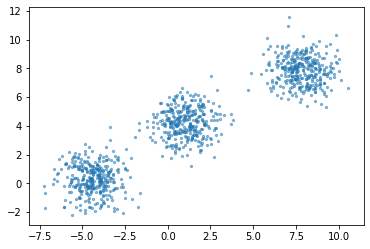

In [3]:
X,y = make_blobs(n_features=2, n_samples=1000, centers=3, cluster_std=1, random_state=3)
plt.scatter(X[:,0], X[:,1], s=5, alpha=.5)

### 3. Distance or Similarity Function
* Data belonging to same cluster are similar & data belonging to different cluster are different. 
* We need mechanisms to measure similarity & differences between data. 
* This can be achieved using any of the below techniques.

 - Minkowski breed of distance calculation: 
 
$$ D\left(X,Y\right)=\left(\sum _{i=1}^{n}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}}$$
 
 
 - Manhatten (p=1), Euclidian (p=2)
 
 - Cosine: Suited for text data 
 - The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:

$$ \mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta $$

 - Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as
 
 $$ {\text{cosine similarity}}=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}}$$
 

In [4]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances,manhattan_distances,cosine_similarity

In [5]:
X = [[0, 1], [1, 1]]

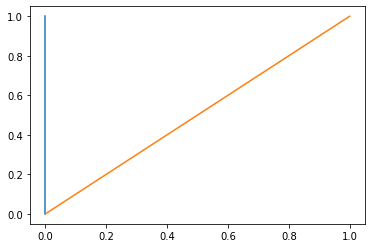

In [6]:
plt.plot([0, 0], [0, 1])
plt.plot([0, 1], [0, 1])
plt.show()

In [7]:
euclidean_distances(X, X)

array([[0., 1.],
       [1., 0.]])

In [8]:
euclidean_distances(X, [[0,0]])

array([[1.        ],
       [1.41421356]])

In [9]:
cosinesimilarity=(0*1+1*1)/(((0**2+1**2)*(1**2+1**2))**0.5)
cosinesimilarity

0.7071067811865475

In [10]:
cosine_similarity(X, X)

array([[1.        , 0.70710678],
       [0.70710678, 1.        ]])

$ {\text{cosine similarity}}=1-{\text{cosine distance}}$

In [11]:
1-1/(2**0.5)

0.29289321881345254

In [12]:
cosine_distances(X,X)

array([[0.        , 0.29289322],
       [0.29289322, 0.        ]])

In [13]:
manhattan_distances(X,X)

array([[0., 1.],
       [1., 0.]])

### 4. Clustering as an Optimization Problem
* Maximize inter-cluster distances
 - This makes the separation between two clusters. The main goal is to maximize the distance between 2 clusters.
* Minimize intra-cluster distances
 - The closer the objects in a cluster, the more likely they belong to the same cluster.

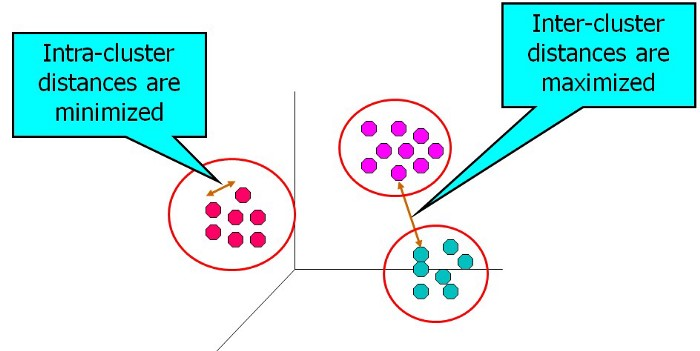

### 5. Types of Clustering
* Partitioning methods
  - Partitions n data into k partitions
  - Initially, random partitions are created & gradually data is moved across different partitions.
  - It uses distance between points to optimize clusters.
  - KMeans & Meanshift are examples of Partitioning methods
* Hierarchical methods
  - These methods does hierarchical decomposition of datasets.
  - One approach is, assume each data as cluster & merge to create a bigger cluster
  - Another approach is start with one cluster & continue splitting
* Density-based methods
  - All above techniques are distance based & such methods can find only spherical clusters and not suited for clusters of other shapes.
  - Continue growing the cluster untill the density becomes lower than certain threashold.

### 6. Partitioning Method
#### KMeans
* Given a set of observations $(x_1, x_2, ..., x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = \{S_1, S_2, ..., S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). 
* Formally, the objective is to find:

$$ {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}={\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}|S_{i}|\operatorname {Var} S_{i}$$

where $μ_i$ is the mean of points in $S_i$. 

* The centroids are chosen in such a way that it minimizes within cluster sum of squares.

* The k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean  of the samples in the cluster. $\mu$

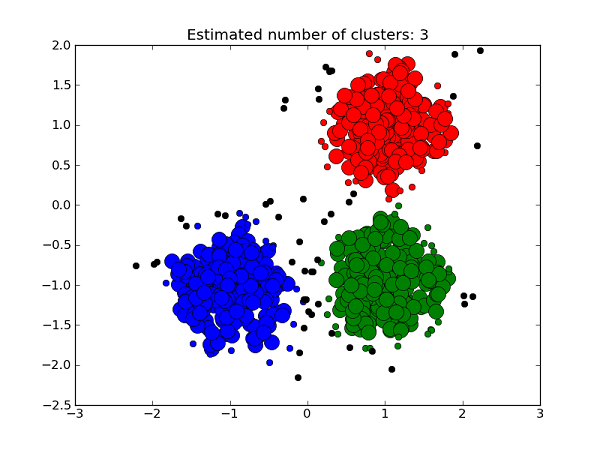

##### KMeans Algorithm
1. Initialize k centroids.
2. Assign each data to the nearest centroid, these step will create clusters.
3. Recalculate centroid - which is mean of all data belonging to same cluster.
4. Repeat steps 2 & 3, till there is no data to reassign a different centroid.

Animation to explain algo - http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

<img src="https://tinyurl.com/yyss8scv" width="750" align="center">

##### KMeans algorithm is sensitive to the starting position of the cluster centres

<img src="https://tinyurl.com/y6oe3x3m" width="750" align="center">

* k-means clustering in scikit offers several extensions to the traditional approach. 
* To prevent the alogrithm returning sub-optimal clustering, the kmeans method includes the `n_init` and `method` parameters. 
* The former just reruns the algorithm with n different initialisations and returns the best output (measured by the within cluster sum of squares). 
* By setting the latter to 'kmeans++' (the default), the initial centres are smartly selected (i.e. better than random). This has the additional benefit of decreasing runtime (less steps to reach convergence).

In [14]:
from sklearn.datasets import make_blobs, make_moons

In [15]:
X,y = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

In [16]:
X

array([[5.43696296, 4.5074116 ],
       [5.12085942, 3.77898746],
       [4.58359315, 6.1258101 ],
       ...,
       [6.48713154, 1.67728923],
       [4.61805275, 6.5479691 ],
       [6.22348727, 3.62548724]])

In [17]:
y

array([0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2,
       2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 2,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1,
       0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0,
       2, 1, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 2, 1,
       2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0,

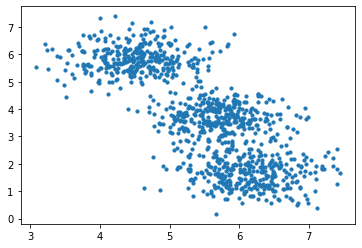

In [18]:
plt.scatter(X[:,0], X[:,1],s=10)

In [19]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN

In [20]:
kmeans = KMeans(n_clusters=3)

#### Compute k-means clustering.

In [21]:
kmeans.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Labels of each point

In [22]:
kmeans.labels_ 

array([2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2,

#### Predict the closest cluster each sample in X belongs to.

In [23]:
kmeans.predict(X) 

array([2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2,
       1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1,
       1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0,
       2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 2,
       1, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0,
       1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2,

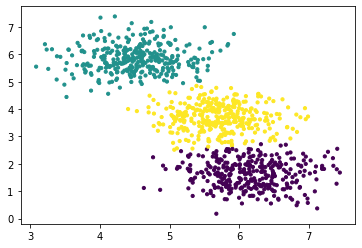

In [24]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

#### When kmeans doesn't work well

In [25]:
X, y = make_moons(n_samples=1000, noise=.09)

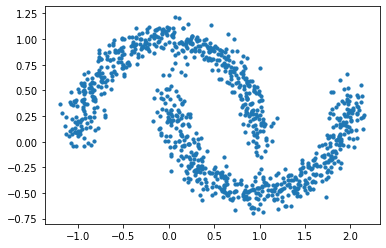

In [26]:
plt.scatter(X[:,0], X[:,1],s=10)

In [27]:
kmeans = KMeans(n_clusters=2)

In [28]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

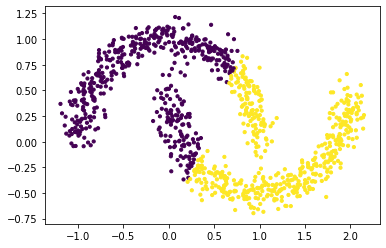

In [29]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

Dataset1
Cluster 0: 1022
Cluster 1: 1018
Cluster 2: 952
Cluster 3: 1008


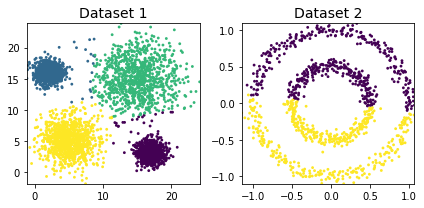

In [30]:
from sklearn import cluster, datasets, mixture

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

kmeans_dataset1 = KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

#### Limitations of KMeans
* Assumes that clusters are convex & behaves poorly for elongated clusters.
* KMeans tries to find local minima & this depends on init value.
* KMeans can also underperform with clusters of different size and density

### Meanshift
* Centroid based clustering algorithm.
* Mode can be understood as highest density of data points.
* Mean-shift algorithm basically assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints i.e. cluster centroid.

#### Compare with K-means
* Unlike K-means clustering, it does not make any assumptions; hence it is a non-parametric algorithm.
* No need to specify the number of clusters in advance because the number of clusters will be determined by the algorithm w.r.t data.
* It's density based, it can detect clusters of any shape.

#### How does meanshift work
* Intuitively, cluster centers are initially mapped onto the dataset randomly (like k-means). 
* Around each centre is a ball (the radius of which is determined by the bandwidth), where the density equates to the number of points inside each ball. 
* The centre of the ball is iteratively nudged towards regions of higher density by shifting the centre to the mean of the points within the ball (hence the name). 
* This process is repeated until balls exhibit little movement.

<img src="https://tinyurl.com/yybq5fex" width="550" align="center">
<img src="https://tinyurl.com/y4jozka9" width="550" align="center">

In [65]:
centers = [[1, 1], [-.75, -1], [1, -1], [-3, 2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

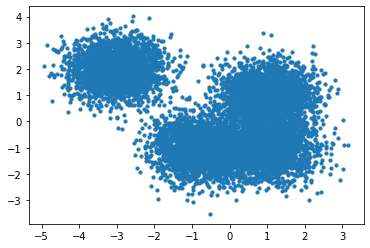

In [66]:
plt.scatter(X[:,0], X[:,1],s=10)

#### Compare with kmeans

In [67]:
kmeans = KMeans(n_clusters=4)

In [68]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

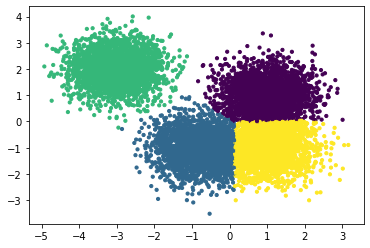

In [69]:
plt.scatter(X[:,0], X[:,1],s=10, c=kmeans.predict(X))

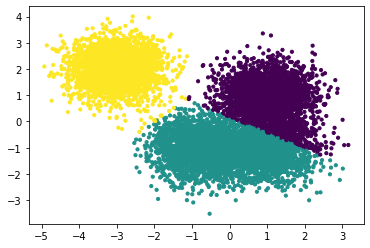

In [71]:
plt.scatter(X[:,0], X[:,1],s=10,c=KMeans(n_clusters=3).fit(X).predict(X))

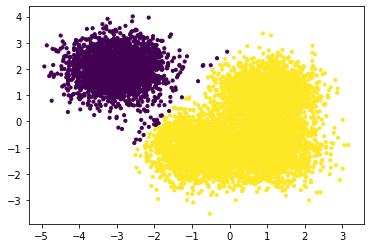

In [72]:
plt.scatter(X[:,0], X[:,1],s=10,c=KMeans(n_clusters=2).fit(X).predict(X))

#### Meanshift

In [35]:
ms = MeanShift()

#### <font color='red'>Warning: This is very slow.</font>

In [36]:
ms.fit(X) 

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

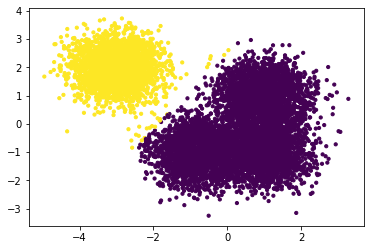

In [37]:
plt.scatter(X[:,0], X[:,1],s=10, c=ms.predict(X))

#### Rethink about meanshift

* Kernel Density Estimation
* Imagine that the above data was sampled from a probability distribution
* Estimate the underlying distribution also called the probability density function for a set of data

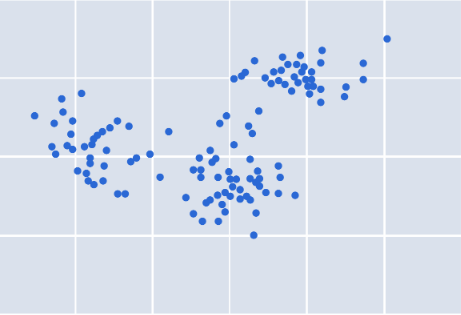

* Kernel Density Estimation Surface

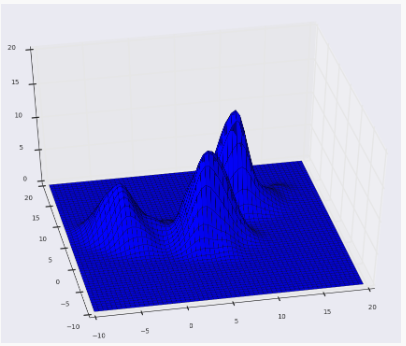

* Density Contour. Meanshift assigns the data points to the clusters iteratively by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift)

<img src="https://tinyurl.com/y5xebsyd" width="550" align="center">


### 7. Hierarchial Clustering
* A method of clustering where you combine similar clusters to create a cluster or split a cluster into smaller clusters such they now they become better.
* Two types of hierarchaial Clustering
  - Agglomerative method, a botton-up approach.
  - Divisive method, a top-down approach.
  
  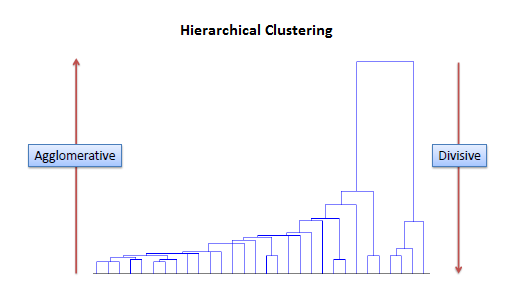

#### Agglomerative method
* Start with assigning one cluster to each data. 
* Combine clusters which have higher similarity.
* Differences between methods arise due to different ways of defining distance (or similarity) between clusters. The following sections describe several agglomerative techniques in detail.


**Single Linkage** 		
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
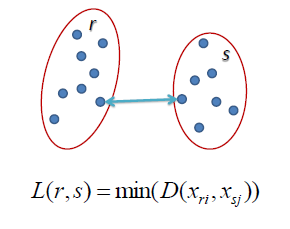

**Complete Linkage**		
In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.
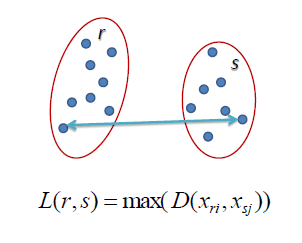

**Average Linkage**	
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
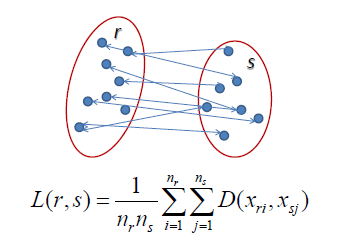

* Hierarchial Clustering doesn't require the user to specify the number of clusters beforehand. 
* Instead it returns an output, from which the user can decide the appropriate number of clusters.

* An example of agglomerative method

<img src="https://tinyurl.com/y6tecycu" width="750" align="center">

* Linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step

<img src="https://tinyurl.com/y3vzc233" width="750" align="center">

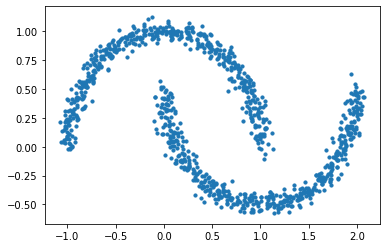

In [39]:
X, y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1],s=10)

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
agc = AgglomerativeClustering(linkage='single')

In [42]:
agc.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

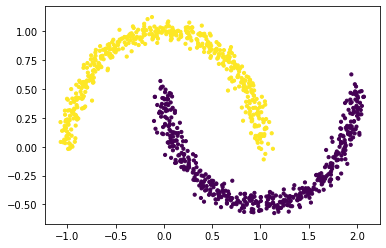

In [43]:
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

### 8. Density Based Clustering - DBSCAN
* The DBSCAN algorithm views clusters as areas of high density separated by areas of low density.

* Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

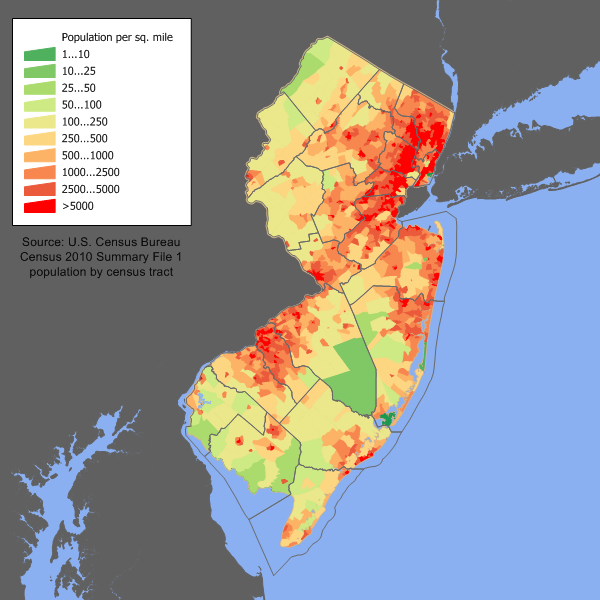

* The central component to the DBSCAN is the **concept of core samples, which are samples that are in areas of high density**. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

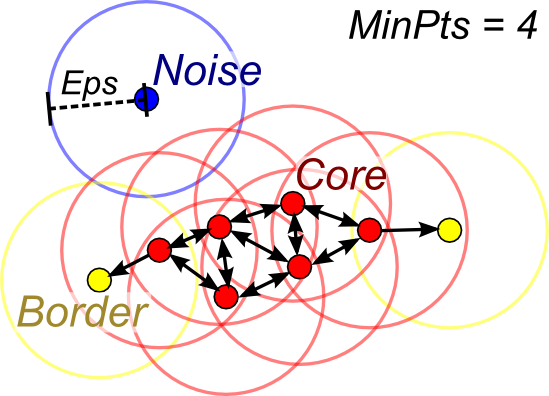

* The user must define the minimum number of observations that constitutes a cluster (minPts) and the size of the neighbourhoods (epsilon- often denoted as eps or  𝜖 ). 
* In simple terms, DBSCAN identifies clusters and then expands those clusters by scanning the neighbourhoods of the assigned points. 
* Once all neighbourhoods have been exhausted, the process repeats with a new cluster, until all observations belong to a segment or have been classified as noise

<img src="https://tinyurl.com/y4rw3ylg" width="550" align="center">

In [44]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

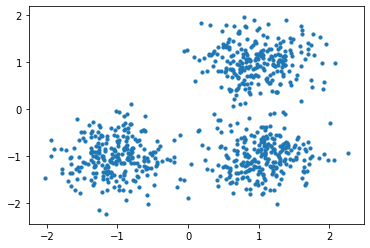

In [45]:
plt.scatter(X[:,0], X[:,1],s=10)

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

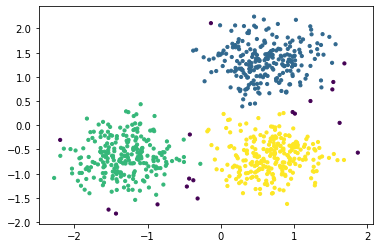

In [48]:
plt.scatter(X[:,0], X[:,1],s=10,c=labels)

Dataset1:
Number of Noise Points: 47 (4000)
Dataset2:
Number of Noise Points: 2 (1000)


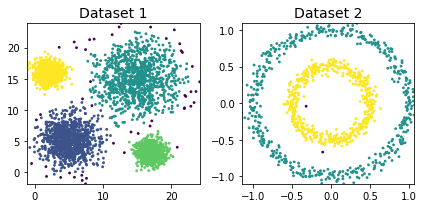

In [49]:
# implenting DBSCAN
dbscan_dataset1 = DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')

cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)

* Another good example showing how the clusters expand on any shape.

<img src="https://tinyurl.com/y2t83txy" width="750" align="center">

* DBSCAN can be very sensitive to epsilon and minPts values

<img src="https://tinyurl.com/y4emqq75" width="750" align="center">

#### Pros of DBSCAN:

* It can discover any number of clusters
* Clusters of varying shapes and sizes can be obtained using the DBSCAN algorithm
* It can detect and ignore outliers
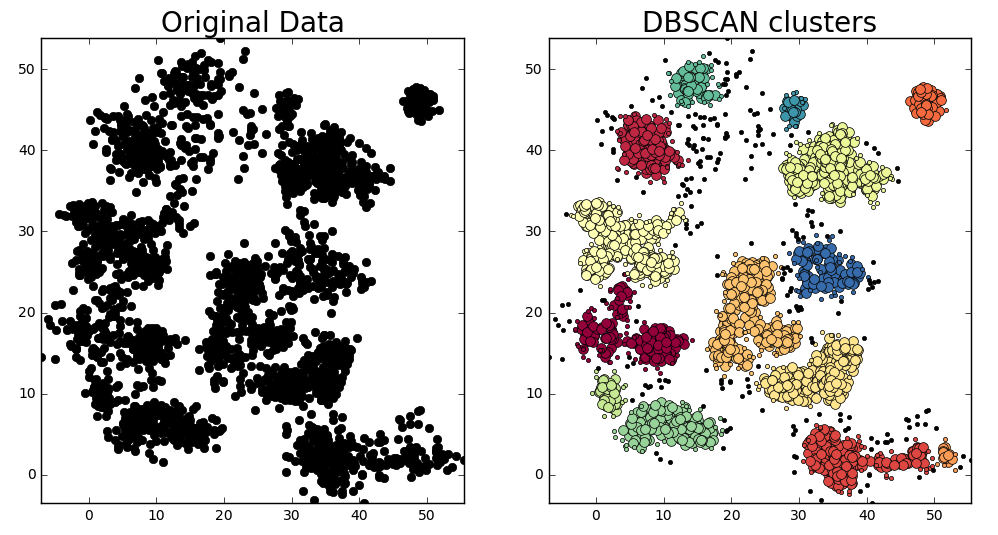

#### Cons of DBSCAN:
* The epsilon value is too sensitive
* too small a value can result in elimination of spare clusters as outliers
* too large a value would merge dense clusters together giving incorrect clusters
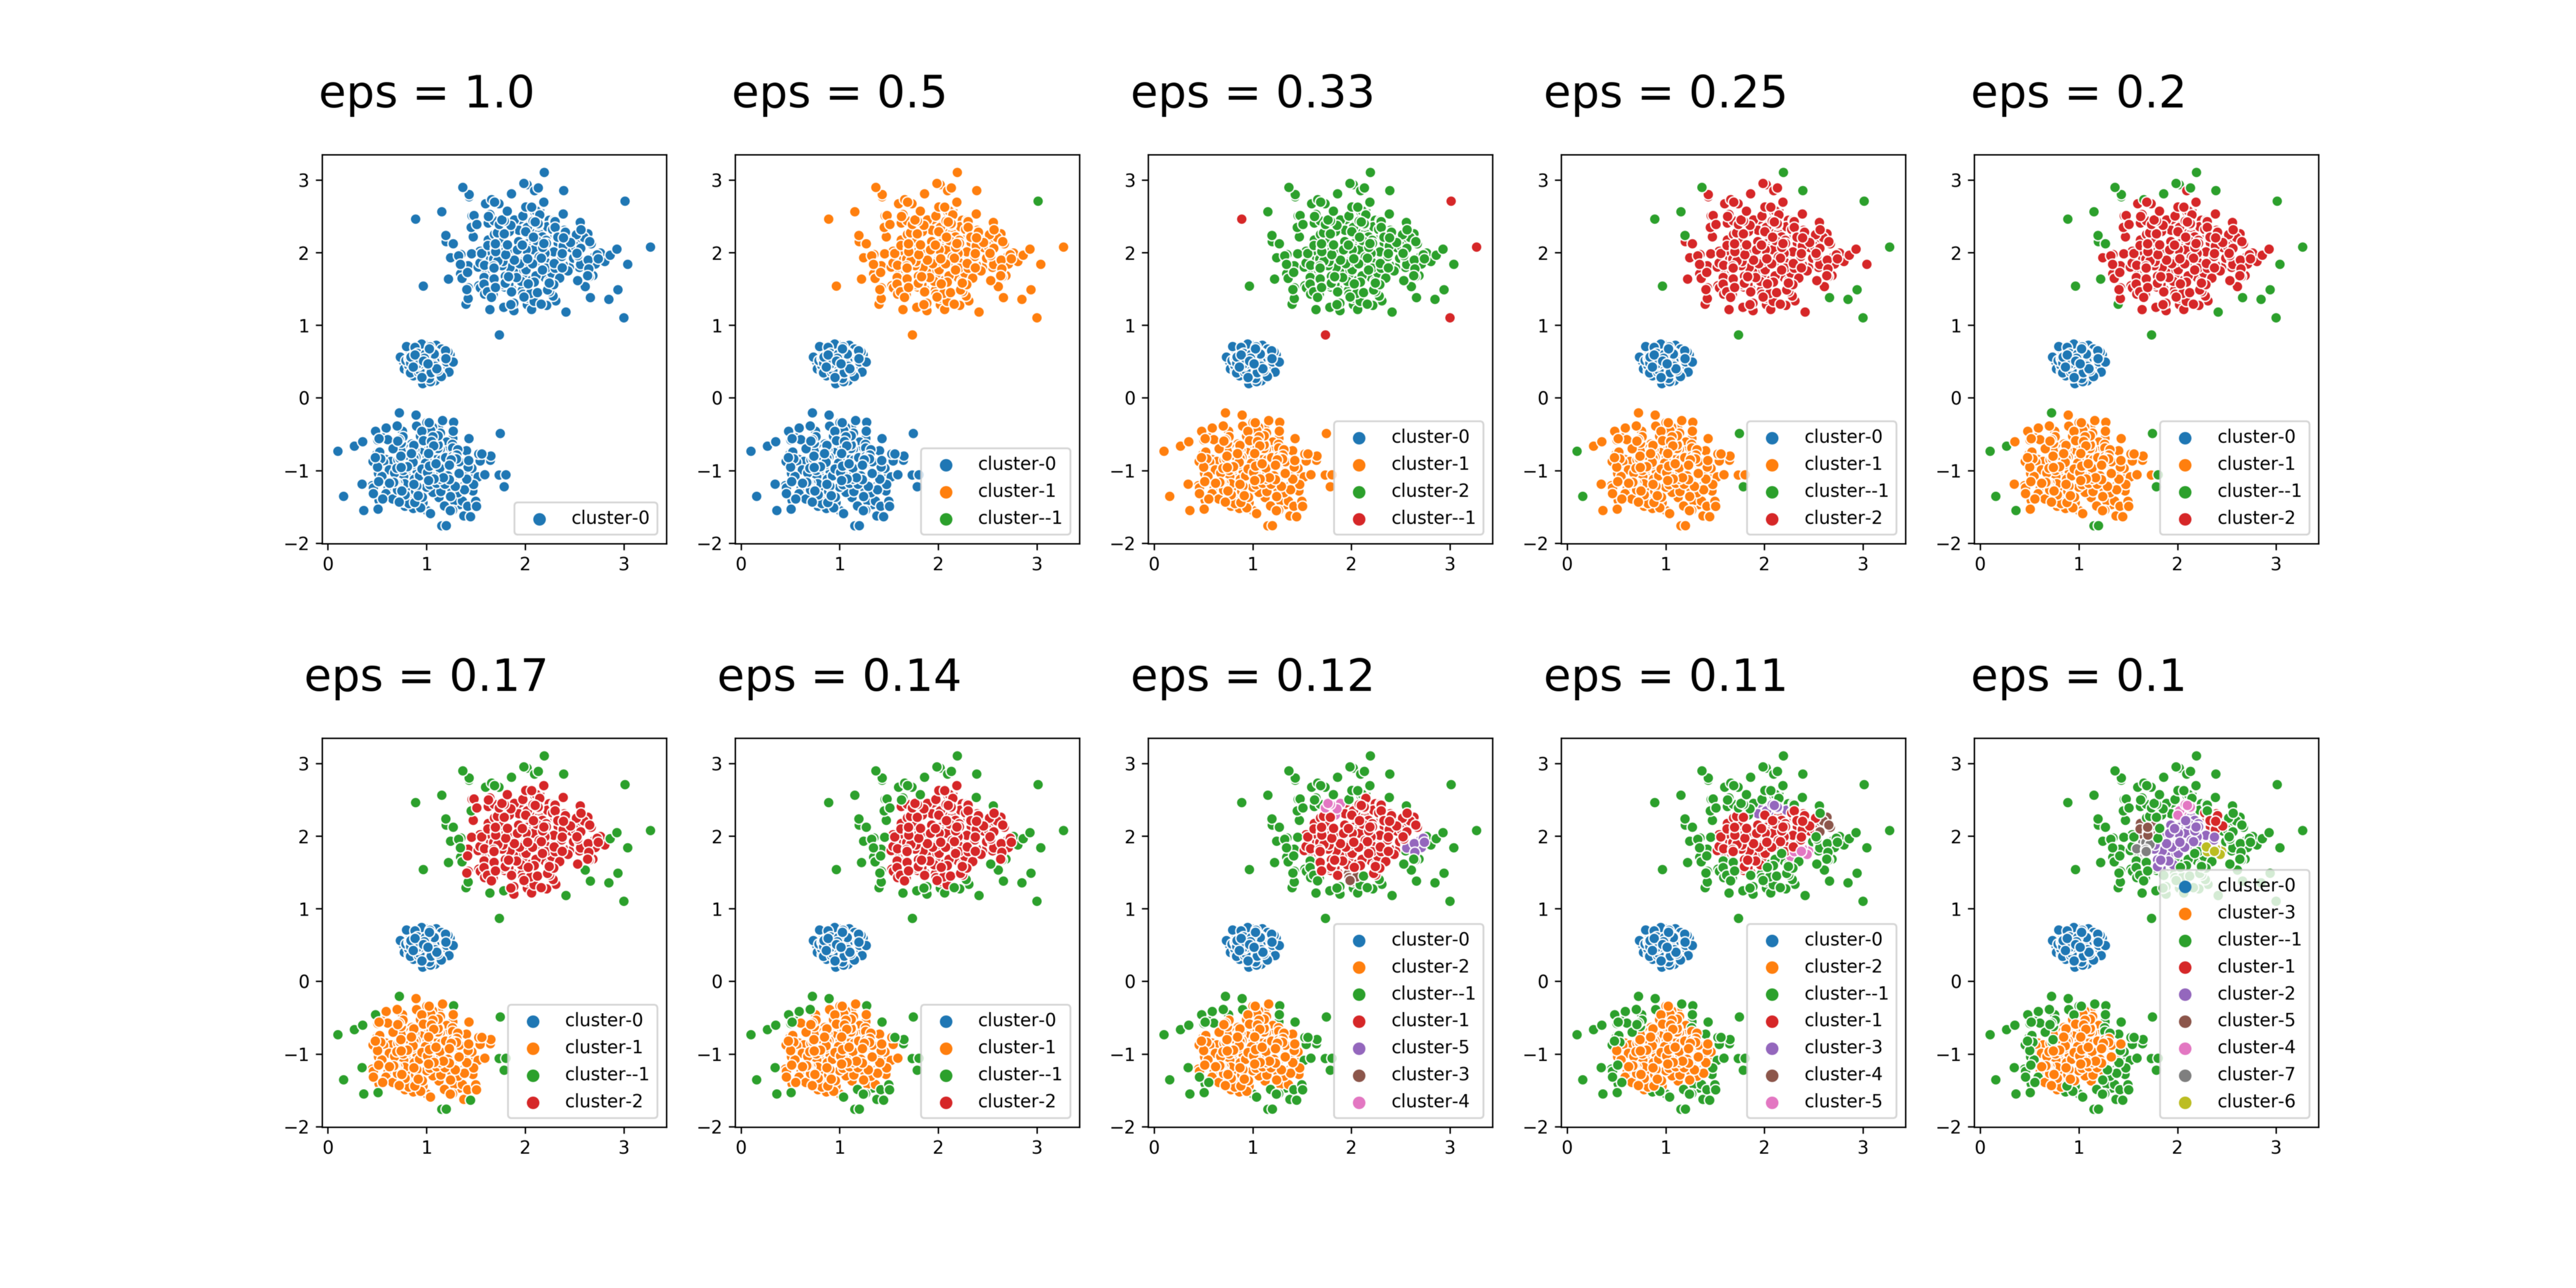

### 9. Measuring Performance of Clusters
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [50]:
from sklearn.metrics.cluster import completeness_score

In [51]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [52]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [53]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [54]:
from sklearn.metrics.cluster import homogeneity_score

In [55]:
homogeneity_score([0, 0, 1, 1], [1, 1, 0, 0])

1.0

In [56]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [57]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Example : Selecting the number of clusters with silhouette analysis on KMeans clustering

In [58]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

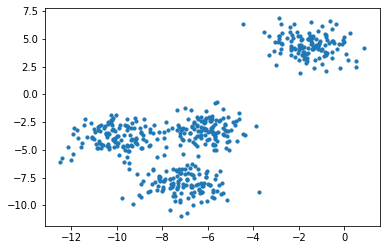

In [59]:
plt.scatter(X[:,0],X[:,1],s=10)

In [60]:
range_n_clusters = [2, 3, 4, 5, 6]

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [62]:
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5745029081702377
6 0.4502815273118934


* Optimal number of clusters seems to be 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [63]:
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2263.3893573785167
6 2040.6949493445443


### 10. Summary

* So which clustering algorithm is the best?
* It depends on the nature of the data. 
    * Is anything known about the underlying structure (e.g. globular versus non-globular)?
    * Are you looking for a specific number of clusters? 
    * etc etc

References

https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

https://github.com/tirthajyoti/Machine-Learning-with-Python/tree/master/Clustering-Dimensionality-Reduction

https://github.com/edyoda/data-science-complete-tutorial/blob/master/12.%20Clustering%20Techniques.ipynb



### Lab exercise: PCA and clustering for Wine Quality Data

#### Data: winequality-red.csv

https://tinyurl.com/y56x3thc


#### Tasks:

* Standardize features.
* Select features and try different clustering algorithms 
* Run PCA and use the 1st and 2nd principal components to run clustering algorithms. Visualize your results.
